In [3]:
import geopandas as gpd
import zipfile
import os
#import fiona
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch, PathPatch
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import random
#import rasterio
#from rasterstats import zonal_stats
import numpy as np

In [4]:
# Extract the zip file
with zipfile.ZipFile('PV_Low_Exc.zip', 'r') as zip_ref:
    zip_ref.extractall('PV_Low_Exc')

FileNotFoundError: [Errno 2] No such file or directory: 'PV_Low_Exc.zip'

In [ ]:
# Find the .shp file in the extracted directory
for file in os.listdir('PV_Low_Exc'):
    if file.endswith(".shp"):
        shapefile = os.path.join('PV_Low_Exc', file)

In [ ]:
shapefile

'PV_Low_Exc\\PV_Low_Exc.shp'

In [ ]:
# Load the shapefile using GeoPandas
gdf = gpd.read_file(shapefile)

# Print the first 5 rows of the GeoDataFrame
print(gdf.head())

  JORDKVALIT KL_METODE KL_TIDSP    KOPIDATO LOKALID  MALEMETODE  \
0          1         D      H94  2019-04-12  206435          22   
1          1         D      H93  2019-04-12  176704          22   
2          1         D      H91  2019-04-12  185034          22   
3          1         D      H93  2019-04-12  156821          99   
4          1         D      H92  2019-04-12  198329          22   

                       NAVNEROM  NOYAKTIGHE         OBJTYPE  OMRADEID  ...  \
0  NO_NIBIO_JORDKVALITET_2019_1           0  Jordsmonnflate       128  ...   
1  NO_NIBIO_JORDKVALITET_2019_1           0  Jordsmonnflate       128  ...   
2  NO_NIBIO_JORDKVALITET_2019_1           0  Jordsmonnflate       122  ...   
3  NO_NIBIO_JORDKVALITET_2019_1           0  Jordsmonnflate       138  ...   
4  NO_NIBIO_JORDKVALITET_2019_1           0  Jordsmonnflate       125  ...   

  ARDYRKING  ARJORDBRUK  ARKARTSTD  ARSKOGBON ARTRESLAG ARTYPE ARVEGET  \
0         0        None       None          0         

<Axes: >

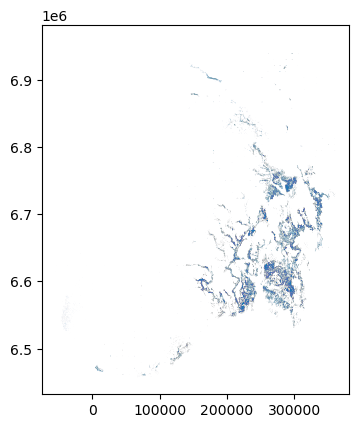

In [ ]:
# Plot the GeoDataFrame
gdf.plot()

In [ ]:
# Extract the zip file
with zipfile.ZipFile('Natur_High_Exc.zip', 'r') as zip_ref:
    zip_ref.extractall('Natur_High_Exc')

In [ ]:
# Find the .shp file in the extracted directory
for file in os.listdir('Natur_High_Exc'):
    if file.endswith(".shp"):
        shapefile1 = os.path.join('Natur_High_Exc', file)

In [ ]:
# Load the shapefile using GeoPandas
gdf = gpd.read_file(shapefile1)

# Print the first 5 rows of the GeoDataFrame
print(gdf.head())

   Id                                      FAKTAARK  FORVALTNIN FORV_MYND  \
0   0                                          None           0      None   
1   0  https://faktaark.naturbase.no/?id=VV00000001           1      Fylk   
2   0  https://faktaark.naturbase.no/?id=VV00000002           1      Fylk   
3   0  https://faktaark.naturbase.no/?id=VV00000003           1      Fylk   
4   0  https://faktaark.naturbase.no/?id=VV00000004           1      Fylk   

   IUCN     LOKALID MOBLANDPRI           NAVN                        NAVNEROM  \
0     0        None       None           None                            None   
1     1  VV00000001          G     Færdesmyra  NO.MILJODIREKTORATET.NATURBASE   
2     1  VV00000002          G  Gjøkvassneset  NO.MILJODIREKTORATET.NATURBASE   
3     4  VV00000003          G    Repparfjord  NO.MILJODIREKTORATET.NATURBASE   
4     1  VV00000004          G       Djupvika  NO.MILJODIREKTORATET.NATURBASE   

           OBJTYPE  ... TRUETVURDE   VERNEDATO  VE

<Axes: >

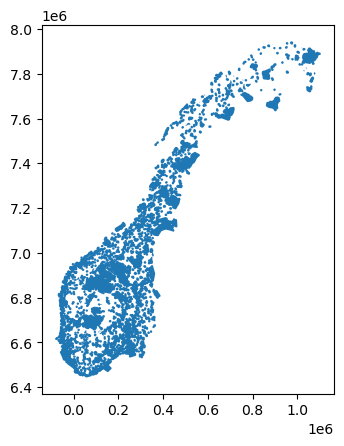

In [ ]:
gdf.plot()

In [ ]:
unique_iucn = gdf['IUCN'].unique()

In [ ]:
print(unique_iucn)

[0 1 4 3 6 5 2]


In [ ]:
iucn_list = gdf['IUCN'].tolist()
print(iucn_list)

[0, 1, 1, 4, 1, 1, 3, 1, 1, 1, 6, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 4, 1, 1, 6, 1, 1, 1, 1, 6, 6, 5, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 6, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 6, 5, 6, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 0, 1, 1, 5, 1, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 

In [ ]:
gdb_path = '0000_25833_ar50_gdb.gdb'
# List all layers in the GDB
layers = fiona.listlayers(gdb_path)
for layer in layers:
    print(layer)

org_ar_ar50_flate


In [ ]:
# Replace 'landscape' with the actual name of the layer you're interested in
layer_name = 'org_ar_ar50_flate'

# Read the layer into a GeoDataFrame
gdf = gpd.read_file(gdb_path, layer=layer_name)

In [ ]:
gdf

,artype,arskogbon,artreslag,arjordbr,arveget,areal,arkartstd,kilde,geometry
0,50,98,39,98,99,1.188990e+04,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-40290.000 6524970.000, -40290..."
1,99,98,98,98,98,6.961873e+09,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((0.000 6980300.000, 0.000 69802..."
2,82,98,98,98,98,2.572468e+09,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-20480.000 6901090.000, -20487..."
3,50,98,39,98,55,1.165619e+05,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-39570.000 6877420.000, -39570..."
4,50,98,39,98,51,2.457512e+04,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-39930.000 6880690.000, -39930..."
...,...,...,...,...,...,...,...,...,...
1896559,30,12,31,98,98,3.988261e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((271350.000 6803450.000, 271350..."
1896560,30,11,31,98,98,3.218883e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((99160.000 6615520.000, 99167.5..."
1896561,50,98,39,98,54,2.703485e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((298860.000 6894000.000, 298840..."
1896562,50,98,39,98,55,2.633873e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((141880.000 7000000.000, 141872..."


In [ ]:
gdf['artype'].unique()

array([50, 99, 82, 30, 20, 60, 81, 10, 70])

<AxesSubplot: >

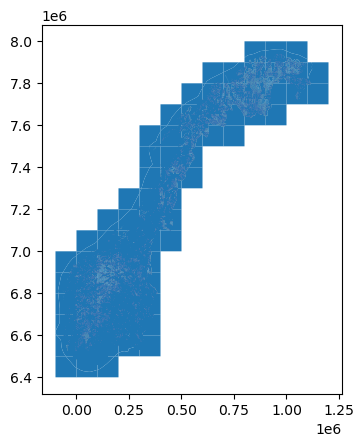

In [ ]:
gdf.plot()

In [ ]:
gdb_path_250 = '0000_ar250_25833_gdb.gdb'
# List all layers in the GDB
layers_250 = fiona.listlayers(gdb_path_250)
for layer in layers_250:
    print(layer)

ar250_flate


In [ ]:
# Replace 'landscape' with the actual name of the layer you're interested in
layer_name_250 = 'ar250_flate'

# Read the layer into a GeoDataFrame
gdf_250 = gpd.read_file(gdb_path_250, layer=layer_name_250)

In [ ]:
gdf_250

,objtype,artype,arskogbon,artreslag,arveget,arjordbr,ardyrking,arkartstd,målemetode,informasjon,oppdateringsdato,originaldatavert,navnerom,kopidato,områdeid,lokalid,fylkeid,komid,geometry
0,arealressursflate,82,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289788,42,4205,"MULTIPOLYGON (((62875.009 6453224.995, 62811.1..."
1,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289789,42,4205,"MULTIPOLYGON (((21146.971 6433670.744, 21462.7..."
2,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290376,42,4225,"MULTIPOLYGON (((21146.360 6433668.931, 20724.1..."
3,arealressursflate,82,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290372,42,4225,"MULTIPOLYGON (((31325.011 6462474.994, 31387.7..."
4,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290375,42,4225,"MULTIPOLYGON (((19789.803 6434149.174, 19781.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591636,arealressursflate,50,98,39,51,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549372,54,5439,"MULTIPOLYGON (((957200.178 7937039.238, 957174..."
591637,arealressursflate,60,11,39,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549371,54,5439,"MULTIPOLYGON (((975662.690 7938065.492, 975857..."
591638,arealressursflate,60,11,39,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549370,54,5439,"MULTIPOLYGON (((974686.747 7937287.540, 974674..."
591639,arealressursflate,50,98,39,52,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549365,54,5439,"MULTIPOLYGON (((973013.619 7938129.986, 973037..."


In [ ]:
gdf_250['artype'].unique()

array(['82', '99', '30', '20', '10', '50', '81', '60', '70'], dtype=object)

In [ ]:
# Filter for forest and agriculture
gdf_forest_agri = gdf_250[gdf_250['artype'].isin(['20', '30'])]


In [ ]:
gdf_forest_agri

,objtype,artype,arskogbon,artreslag,arveget,arjordbr,ardyrking,arkartstd,målemetode,informasjon,oppdateringsdato,originaldatavert,navnerom,kopidato,områdeid,lokalid,fylkeid,komid,geometry
5,arealressursflate,30,17,33,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291306,42,4225,"MULTIPOLYGON (((37242.899 6463691.306, 37167.2..."
6,arealressursflate,30,17,33,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289585,42,4205,"MULTIPOLYGON (((37242.918 6463691.302, 37522.1..."
7,arealressursflate,20,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291295,42,4225,"MULTIPOLYGON (((37275.011 6464024.994, 37375.0..."
10,arealressursflate,30,17,32,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289676,42,4205,"MULTIPOLYGON (((33950.011 6458724.994, 33883.4..."
12,arealressursflate,30,17,31,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291296,42,4225,"MULTIPOLYGON (((37450.011 6464324.994, 37356.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591160,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549188,54,5439,"MULTIPOLYGON (((964587.307 7896914.835, 964612..."
591175,arealressursflate,30,11,32,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5440,538159,54,5440,"MULTIPOLYGON (((1019984.812 7896810.506, 10201..."
591223,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5438,550918,54,5438,"MULTIPOLYGON (((945437.711 7898636.895, 945384..."
591242,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5438,549595,54,5438,"MULTIPOLYGON (((944913.618 7899963.755, 945083..."


In [ ]:
area_by_fylke = gdf_250.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area
area_by_fylke

/tmp/ipykernel_1611431/1035145591.py:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  area_by_fylke = gdf_250.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


fylkeid
3     4.807548e+08
11    1.653218e+10
15    2.546814e+10
18    8.055730e+10
30    2.581037e+10
34    5.207245e+10
38    2.019927e+10
42    2.297323e+10
46    4.961032e+10
50    5.966697e+10
54    1.154194e+11
dtype: float64

In [ ]:
total_area_forest_agri = gdf_forest_agri['geometry'].to_crs(epsg=3035).area.sum()
total_area_forest_agri = gdf_forest_agri['geometry'].area.sum()
total_area_forest_agri

In [ ]:
fylke_area_forest = gdf_forest_agri.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


/tmp/ipykernel_1611431/1097310461.py:2: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  fylke_area_forest = gdf_forest_agri.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


In [ ]:
fylke_area_forest

fylkeid
3     2.991308e+08
11    4.256481e+09
15    5.597029e+09
18    1.296081e+10
30    1.732753e+10
34    2.845566e+10
38    1.161644e+10
42    1.048490e+10
46    1.135253e+10
50    1.855704e+10
54    2.182390e+10
dtype: float64

In [ ]:
forest_to_area_by_fylke = fylke_area_forest/area_by_fylke

In [ ]:
nuts_to_fylkeid = {
    3: "NO03",
    11: "NO11",
    15: "NO15",
    18: "NO18",
    30: "NO30",
    34: "NO34",
    38: "NO38",
    42: "NO42",
    46: "NO46",
    50: "NO50",
    54: "NO54",
}


In [ ]:
forest_to_area_by_fylke.index=forest_to_area_by_fylke.index.to_series().replace(nuts_to_fylkeid)
forest_to_area_by_fylke=forest_to_area_by_fylke.to_frame(name='forest_area_proportion')
forest_to_area_by_fylke.index.name = 'index'
forest_to_area_by_fylke

,forest_area_proportion
index,
NO03,0.622211
NO11,0.257466
NO15,0.219766
NO18,0.160889
NO30,0.671340
NO34,0.546463
NO38,0.575092
NO42,0.456396
NO46,0.228834


In [ ]:
area_by_fylke.index=area_by_fylke.index.to_series().replace(nuts_to_fylkeid)
area_by_fylke=area_by_fylke.to_frame(name='total_fylke_area')
area_by_fylke.index.name = 'index'
area_by_fylke

,total_fylke_area
index,
NO03,4.807548e+08
NO11,1.653218e+10
NO15,2.546814e+10
NO18,8.055730e+10
NO30,2.581037e+10
NO34,5.207245e+10
NO38,2.019927e+10
NO42,2.297323e+10
NO46,4.961032e+10


In [ ]:
# Open a geospatial TIFF file
corine_tiff = 'CORINE.tiff'
with rasterio.open(corine_tiff) as src:
    # Read the entire array
    corine_data = src.read(1)  # Assuming the data is in band 1
    # Get unique codes
    unique_codes = np.unique(corine_data)
    #print("Unique CORINE land cover codes:", unique_codes)
    #print(f"Raster CRS: {src.crs}")
    #print(f"Raster Bounds: {src.bounds}")
    #print(f"Raster Resolution: {src.res}")
    codes_of_interest = {3, 7, 26, 30, 31, 32, 43} #Bare rock mountains Industry natural grassland nearshore areas sparesely vegetated areas 
    selected_areas_mask = np.isin(corine_data, list(codes_of_interest))
    #selected_areas_mask = np.isin(corine_data, list(codes_of_interest)) & (corine_data != src.nodata)

In [ ]:
#total_pixels = selected_areas_mask.size
#true_pixels = np.sum(selected_areas_mask)
#false_pixels = total_pixels - true_pixels
#true_percentage = (true_pixels / total_pixels) * 100
#true_percentage

In [ ]:
desired_country = "NO"

file_name = "NUTS_RG_60M_2021_4326_NO_LEVL_3_REST_LEVL_0.geojson"

desired_regions = [
    "NO020",
    "NO060",
    "NO071",
    "NO074",
    "NO081",
    "NO082",
    "NO091",
    "NO092",
    "NO0A1",
    "NO0A2",
    "NO0A3",
]


europe = (
    gpd.read_file(file_name)
    .replace({"UK": "GB", "EL": "GR"})
    .rename(columns={"NUTS_ID": "index"})
    .loc[:, ["index", "geometry"]]
    .sort_values("index")
    .set_index("index")
    .loc[desired_regions]
)
europe = europe[europe.index.str.contains("NO")]
rectx1 = -12
rectx2 = 44
recty1 = 33
recty2 = 81
polygon = Polygon(
    [
        (rectx1, recty1),
        (rectx1, recty2),
        (rectx2, recty2),
        (rectx2, recty1),
        (rectx1, recty1),
    ]
)
europe = gpd.clip(europe, polygon)

In [ ]:
nuts_to_ssb = {
    "NO081": "NO03",
    "NO082": "NO30",
    "NO020": "NO34",
    "NO091": "NO38",
    "NO092": "NO42",
    "NO0A1": "NO11",
    "NO0A2": "NO46",
    "NO0A3": "NO15",
    "NO060": "NO50",
    "NO071": "NO18",
    "NO074": "NO54",
}
europe.index = europe.index.to_series().replace(nuts_to_ssb)

<AxesSubplot: >

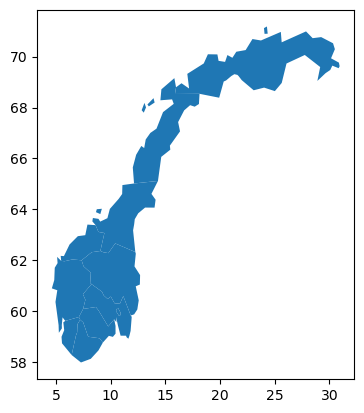

In [ ]:
europe.plot()

In [ ]:
europe_join_areas = europe.join(area_by_fylke, on='index')
europe_join_areas

,geometry,total_fylke_area
index,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10


In [ ]:
europe_join_areas=europe_join_areas.join(forest_to_area_by_fylke, on='index')
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion
index,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010


In [ ]:
europe2=europe
europe2 = europe2.to_crs(src.crs)
# Use zonal_stats to get area of selected codes within Norway's fylkes
stats = zonal_stats(europe2, selected_areas_mask.astype(int), affine=src.transform,
                    stats="sum",  # This counts the number of cells
                    nodata=0)
stats

In [ ]:
stats

[{'sum': 195933.0},
 {'sum': 285678.0},
 {'sum': 179544.0},
 {'sum': 240185.0},
 {'sum': 1431208.0},
 {'sum': 492905.0},
 {'sum': 1383.0},
 {'sum': 1226326.0},
 {'sum': 893698.0},
 {'sum': 1609161.0},
 {'sum': 3161376.0}]

In [ ]:
cell_area = src.res[0] * src.res[1]
#coverting pixels into area
europe_join_areas['selected_area_corine'] = [s['sum'] * cell_area for s in stats]
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,selected_area_corine
index,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,1.959330e+09
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,2.856780e+09
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,1.795440e+09
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,2.401850e+09
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,1.431208e+10
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,4.929050e+09
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,1.383000e+07
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,1.226326e+10
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,8.936980e+09


In [ ]:
europe_join_areas['corine_areas_proportion']=europe_join_areas.selected_area_corine/europe_join_areas.total_fylke_area
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,selected_area_corine,corine_areas_proportion
index,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,1.959330e+09,0.085288
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,2.856780e+09,0.172801
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,1.795440e+09,0.088886
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,2.401850e+09,0.093058
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,1.431208e+10,0.288490
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,4.929050e+09,0.193538
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,1.383000e+07,0.028767
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,1.226326e+10,0.235504
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,8.936980e+09,0.149781


In [ ]:
solar_wind_prop = [
    ['NO42',	0.18918890430933,	0.81081109569067],
    ['NO03',	0.0689649762189737,	0.931035023781026],
    ['NO54',	0.6571432285718	,   0.3428567714282],
    ['NO15',	0.639999376000998,	0.360000623999002],
    ['NO38',	0.296296207133142,	0.703703792866859],
    ['NO50',	0.666666666666667,	0.333333333333333],
    ['NO11',	0.540540730460447,	0.459459269539553],
    ['NO34',	0.249999419642546,	0.750000580357454],
    ['NO30',	0.142857142857143,	0.857142857142857],
    ['NO18',	0.696969816345343,	0.303030183654657],
    ['NO46',	0.631578677285603,	0.368421322714397],
]
    
new_columns = ['index', 'wind', 'solar']
df_solar_wind = pd.DataFrame(solar_wind_prop, columns=new_columns)
#df_solar_wind.set_index('index').astype(str)

In [ ]:
df_solar_wind = df_solar_wind.set_index('index')
df_solar_wind

,wind,solar
index,,
NO42,0.189189,0.810811
NO03,0.068965,0.931035
NO54,0.657143,0.342857
NO15,0.639999,0.360001
NO38,0.296296,0.703704
NO50,0.666667,0.333333
NO11,0.540541,0.459459
NO34,0.249999,0.750001
NO30,0.142857,0.857143


In [ ]:
europe_join_areas = europe_join_areas.join(df_solar_wind)
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,selected_area_corine,corine_areas_proportion,wind,solar
index,,,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,1.959330e+09,0.085288,0.189189,0.810811
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,2.856780e+09,0.172801,0.540541,0.459459
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,1.795440e+09,0.088886,0.296296,0.703704
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,2.401850e+09,0.093058,0.142857,0.857143
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,1.431208e+10,0.288490,0.631579,0.368421
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,4.929050e+09,0.193538,0.639999,0.360001
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,1.383000e+07,0.028767,0.068965,0.931035
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,1.226326e+10,0.235504,0.249999,0.750001
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,8.936980e+09,0.149781,0.666667,0.333333


In [ ]:
europe_join_areas = europe_join_areas.to_crs("EPSG:4326").assign(
        center = lambda x : x.geometry.centroid,
        x_coord = lambda x : x.centroid.x,
        y_coord = lambda x : x.centroid.y,
)
europe_join_areas

/tmp/ipykernel_1611431/189811399.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = lambda x : x.geometry.centroid,
/tmp/ipykernel_1611431/189811399.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_coord = lambda x : x.centroid.x,
/tmp/ipykernel_1611431/189811399.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_coord = lambda x : x.centroid.y,


,geometry,total_fylke_area,forest_area_proportion,selected_area_corine,corine_areas_proportion,wind,solar,center,x_coord,y_coord
index,,,,,,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,1.959330e+09,0.085288,0.189189,0.810811,POINT (7.66777 58.69972),7.667772,58.699718
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,2.856780e+09,0.172801,0.540541,0.459459,POINT (6.25497 59.13614),6.254969,59.136139
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,1.795440e+09,0.088886,0.296296,0.703704,POINT (8.73770 59.49112),8.737703,59.491118
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,2.401850e+09,0.093058,0.142857,0.857143,POINT (9.87374 60.07583),9.873744,60.075826
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,1.431208e+10,0.288490,0.631579,0.368421,POINT (6.33462 60.89720),6.334620,60.897201
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,4.929050e+09,0.193538,0.639999,0.360001,POINT (7.62646 62.61450),7.626461,62.614500
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,1.383000e+07,0.028767,0.068965,0.931035,POINT (10.71410 59.98099),10.714101,59.980995
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,1.226326e+10,0.235504,0.249999,0.750001,POINT (10.42612 61.42611),10.426124,61.426108
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,8.936980e+09,0.149781,0.666667,0.333333,POINT (11.34155 63.75513),11.341552,63.755127


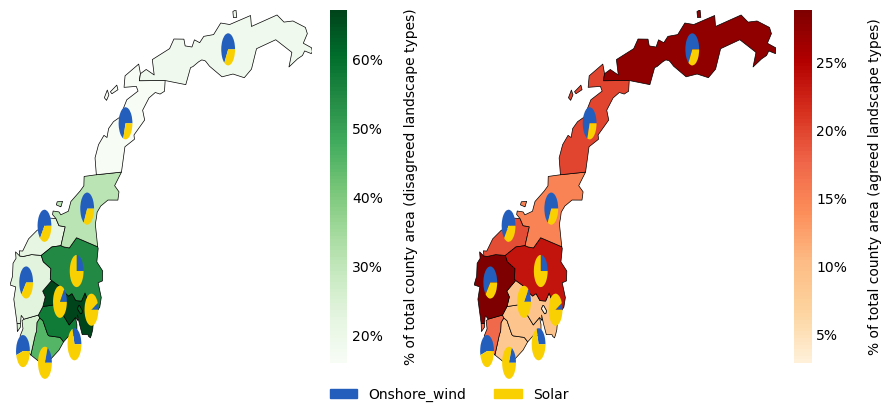

In [ ]:

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

border_line_thickness = 0.5
forest_colors = ['#f7fcf5', '#e5f5e0', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
corine_colors = ['#fef0d9', '#fdd49e', '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#b30000', '#7f0000']

n_bins = 100
forest_cmap = LinearSegmentedColormap.from_list('custom_green', colors, N=n_bins)
corine_cmap = LinearSegmentedColormap.from_list('custom_orange', corine_colors, N=n_bins)


pie_wind_color = '#235ebc'
pie_solar_color = '#f9d002'

# Function to create pie charts
def make_pie(sizes, colors, x, y, size, ax, zorder):
    wedges, _ = ax.pie(sizes, colors=colors, center=(x, y), radius=size, wedgeprops=dict(edgecolor='none'))
        # Set zorder for each wedge individually
    for wedge in wedges:
        wedge.set_zorder(zorder)   
    return wedges 


pie_offset = [
    ['NO42',	0,	-0.7],
    ['NO03',	1,	0],
    ['NO54',	0,   0],
    ['NO15',	0,	0.5],
    ['NO38',	1.5,	-0.8],
    ['NO50',	0.,	0],
    ['NO11',	-0.5,	-0.7],
    ['NO34',	0,	0],
    ['NO30',	-0.9,	0.2],
    ['NO18',	0,	0],
    ['NO46',	-0.3,	0.1],
]

# Adding pies to represent wind and solar installation proportions
#for idx, row in europe_fylke_join_SW_copy.iterrows():
def add_pies_to_axis(ax):
    for idx, x_offset, y_offset in pie_offset:
        row = europe_join_areas.loc[idx]
        wind_prop = row['wind']
        solar_prop = row['solar']
        x, y = row['x_coord']+x_offset, row['y_coord']+y_offset
        #x, y = add_offset(x, y)
        pie_sizes = [wind_prop, solar_prop]  # Make sure they add up to 1
        # Add a pie chart at the centroid location
        make_pie(pie_sizes, [pie_wind_color, pie_solar_color], x, y, 0.6, ax, zorder=4)   


#sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=europe_fylke_join_SW_copy['forest_prop'].min(), vmax=europe_fylke_join_SW_copy['forest_prop'].max()))

add_pies_to_axis(ax1)
europe_join_areas.plot(column='forest_area_proportion', cmap=forest_cmap, linewidth=border_line_thickness, ax=ax1, edgecolor='black')
F_sm = plt.cm.ScalarMappable(cmap=forest_cmap, norm=plt.Normalize(vmin=europe_join_areas['forest_area_proportion'].min(), vmax=europe_join_areas['forest_area_proportion'].max()))
cbar1 = fig.colorbar(F_sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.04)
cbar1.outline.set_visible(False)
cbar1.ax.tick_params(size=0)
cbar1.ax.tick_params(labelsize=10)
cbar1.set_label('% of total county area (disagreed landscape types)', fontsize=10, labelpad=15)
cbar1.set_ticks([0.2, 0.3, 0.4, 0.5, 0.6])
cbar1.set_ticklabels(['20%', '30%', '40%', '50%', '60%'])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')



add_pies_to_axis(ax2)
europe_join_areas.plot(column='corine_areas_proportion', cmap=corine_cmap, linewidth=border_line_thickness, ax=ax2, edgecolor='black')
C_sm = plt.cm.ScalarMappable(cmap=corine_cmap, norm=plt.Normalize(vmin=europe_join_areas['corine_areas_proportion'].min(), vmax=europe_join_areas['corine_areas_proportion'].max()))
cbar2 = fig.colorbar(C_sm, ax=ax2, orientation='vertical', fraction=0.05, pad=0.04)
cbar2.outline.set_visible(False)
cbar2.ax.tick_params(size=0)
cbar2.ax.tick_params(labelsize=10)
cbar2.set_label('% of total county area (agreed landscape types)', fontsize=10, labelpad=15)
cbar2.set_ticks([0.05, 0.1, 0.15, 0.20, 0.25])
cbar2.set_ticklabels(['5%', '10%', '15%', '20%', '25%'])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')



# Prepare patches for the legend
wind_patch = Patch(color=pie_wind_color, label='Onshore_wind')
solar_patch = Patch(color=pie_solar_color, label='Solar')
#legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=10, frameon=False, bbox_to_anchor=(0.3, 0.9))
legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=10, loc='upper center', bbox_to_anchor=(0.55, 0.05), ncol=2, frameon=False)


 #Set the plot limits to focus on the relevant area
ax1.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax1.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

ax2.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax2.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

#ax.set_position(pos)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08) 
plt.savefig('lanscapes_technology_correlation.png', dpi=300, bbox_inches='tight')
plt.savefig('lanscapes_technology_correlation.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Correlation of county-wise technology preferences with landscape preferences

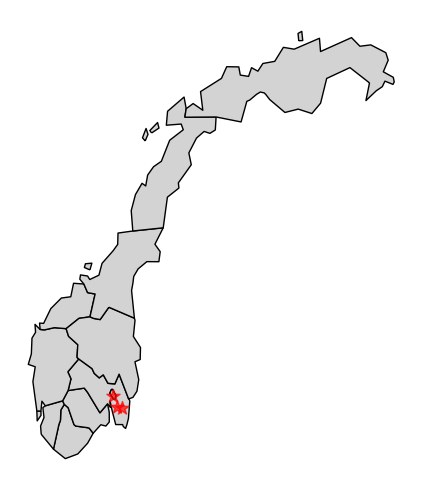

In [ ]:
#workshops_locations
#IB = 59.94226, 10.73338
#Mysen = 59.55, 11.33
#askim: 59.6, 11.1

schools_data = {
    'School': ['Oslo', 'Mysen', 'Askim'],
    'Longitude': [10.73, 11.33, 11],
    'Latitude': [59.94226, 59.55, 59.6]
}
schools_df = pd.DataFrame(schools_data)
fig, ax = plt.subplots(figsize=(5, 5))
europe.plot(ax=ax, color='lightgrey', edgecolor='black')

schools_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', 
                color='red', marker='*', s=100, alpha=0.7)

# Plot school locations with custom location pin markers
#for _, row in schools_df.iterrows():
#    ax.annotate(row['School'], (row['Longitude'], row['Latitude']), 
                #xytext=(0, -15), textcoords='offset points', fontsize=8,
                #ha='center', va='top',
                #bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
#               )
    
    # Add text labels for each school
    #ax.annotate(row['School'], (row['Longitude'], row['Latitude']), 
    #            xytext=(5, 5), textcoords='offset points', fontsize=8,
    #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ax.axis('off')
plt.tight_layout()
plt.savefig('workshop_locations.png', dpi=300, bbox_inches='tight')



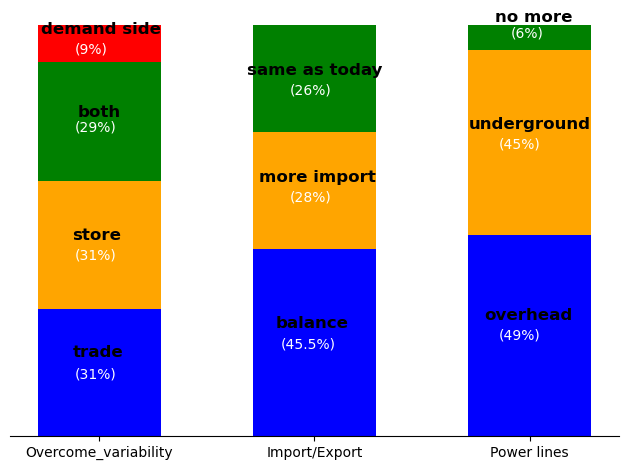

In [ ]:
#correlation of questions: solar/wind variability, import/export, transmission

#variability = [31, 31, 29, 9]  # sum should be 100% [trade, store, both, demand_response]
#imp_export = [45.5, 28.5, 26]  # sum should be 100% [balanced, more import, same as today]
#power_lines = [49, 45, 6]  # sum should be 100% [over, under, no_more]

Ast =[31, 45.5, 49]
Bst =[31, 28.5, 45]
Cst=[29, 26, 6]
Dst= [9, np.nan, np.nan]

AAst =[31, 45.5, 49]
BBst =[62, 74, 94]
CCst=[91, 100, 100]
DDst= [100, np.nan, np.nan]


bar1_label = ['trade', 'balance', 'overhead', 'demand response']
bar2_label = ['store', 'more import', 'underground']
bar3_label = ['both', 'same as today', 'no more']
bar4_label = ['demand side', '', '']



colors = ['blue', 'orange', 'green', 'red']

N = 3
barWidth = 0.2
ind = [0, 0.35, 0.7]

#postion_x = [0, 2, 4]

fig, ax = plt.subplots()

bars1 = ax.bar(ind, Ast, color=colors[0], edgecolor='none', width=barWidth)
bars2 = ax.bar(ind, Bst, color=colors[1], edgecolor='none', width=barWidth, bottom=AAst,)
bars3 = ax.bar(ind, Cst, color=colors[2], edgecolor='none', width=barWidth, bottom=BBst,)
bars4 = ax.bar(ind, Dst, color=colors[3], edgecolor='none', width=barWidth, bottom=CCst,)


ax.text(0-0.04, AAst[0]/2-1.5, f'({AAst[0]:.0f}%)', color='white')
ax.text(0+0.04, AAst[0]/2+3, bar1_label[0], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.295, AAst[1]/2-1.5, f'({AAst[1]:.1f}%)', color='white')
ax.text(0+0.405, AAst[0]/2+10, bar1_label[1], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.65, AAst[2]/2-1, f'({AAst[2]:.0f}%)', color='white')
ax.text(0+0.77, AAst[2]/2+3, bar1_label[2], ha='right', va='bottom', fontsize=12, fontweight='bold')

ax.text(0-0.04, BBst[0]-19, f'({Bst[0]:.0f}%)', color='white')
ax.text(0+0.035, BBst[0]-15, bar2_label[0], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.31, BBst[1]-17, f'({Bst[1]:.0f}%)', color='white')
ax.text(0+0.45, BBst[1]-13, bar2_label[1], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.65, BBst[2]-24, f'({Bst[2]:.0f}%)', color='white')
ax.text(0+0.8, BBst[2]-20, bar2_label[2], ha='right', va='bottom', fontsize=12, fontweight='bold')

ax.text(0-0.04, CCst[0]-17, f'({Cst[0]:.0f}%)', color='white')
ax.text(0+0.035, CCst[0]-14, bar3_label[0], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.31, CCst[1]-17, f'({Cst[1]:.0f}%)', color='white')
ax.text(0+0.46, CCst[1]-13, bar3_label[1], ha='right', va='bottom', fontsize=12, fontweight='bold')
ax.text(0+0.67, CCst[2]-3, f'({Cst[2]:.0f}%)', color='white')
ax.text(0+0.77, CCst[2], bar3_label[2], ha='right', va='bottom', fontsize=12, fontweight='bold')

ax.text(0-0.04, DDst[0]-7, f'({Dst[0]:.0f}%)', color='white')
ax.text(0+0.10, DDst[0]-3, bar4_label[0], ha='right', va='bottom', fontsize=12, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, right=False, top=False)
ax.set_yticks([])

ax.set_xticks(ind)
ax.set_xticklabels(['Overcome_variability', 'Import/Export', 'Power lines'])

plt.tight_layout()
plt.savefig('variaability_import_transimission.png', dpi=300, bbox_inches='tight')

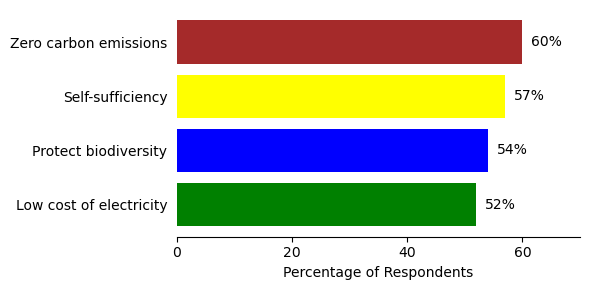

In [ ]:
# What is the most important when producing electricity

options = [
    "Zero carbon emissions",
    "Self-sufficiency",
    "Low cost of electricity",
    "Protect biodiversity"
]
respondents = [60, 57, 52, 54]  # Replace with your actual data


# Sort the data
sorted_idx = sorted(range(len(respondents)), key=lambda i: respondents[i])
options = [options[i] for i in sorted_idx]
respondents = [respondents[i] for i in sorted_idx]


# Create a horizontal bar chart
plt.figure(figsize=(6, 3))
bars = plt.barh(options, respondents, color=['green', 'blue', 'yellow', 'brown'])
plt.xlabel('Percentage of Respondents')
#plt.title('Most important factors in electricity production')

# Set the limit for the x-axis from 0 to 100
plt.xlim(0, 70)
plt.xticks(range(0, 70, 20))

# Optionally, remove the y-ticks if you want a cleaner look
#plt.yticks([])

for bar in bars:
    plt.text(bar.get_width() + 1.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center')



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)


# Show the plot
plt.tight_layout()
plt.savefig('imp_to_produce_electricity.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Imp_to_produce_electricity could be placed with words figure as both shows less concerened about cost and more about nature

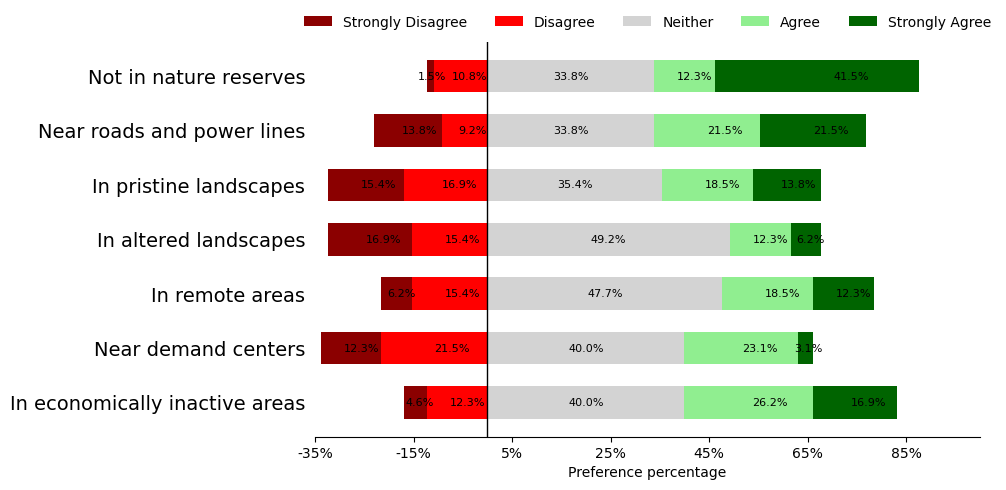

In [ ]:

# Sample survey responses
data = {
    'Strongly Disagree': [3, 8, 4, 11, 10, 9, 1],
    'Disagree': [8, 14, 10, 10, 11, 6, 7],
    'Neither': [26, 26, 31, 32, 23, 22, 22],
    'Agree': [17, 15, 12, 8, 12, 14, 8],
    'Strongly Agree': [11, 2, 8, 4, 9, 14, 27]
}

# Convert the dictionary to a DataFrame and normalize the data to get percentages
df = pd.DataFrame(data)
df_percent = df.divide(df.sum(axis=1), axis=0)*100

# Define the midpoint for the neutral category (this will be our center for the diverging bars)
midpoint = df_percent['Neither']

# Define the order from the 'Strongly Disagree' to 'Strongly Agree'
order = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Initialize the left counter - will be used to keep track of where to start the left-most segment
#left_counter = midpoint
#print(left_counter)

# Define colors for each category
category_colors = {
    'Strongly Disagree': 'darkred',
    'Disagree': 'red',
    'Neither': 'lightgrey',
    'Agree': 'lightgreen',
    'Strongly Agree': 'darkgreen'
}

left = df_percent[['Strongly Disagree', 'Disagree']].sum(axis=1) * -1
#print(left)

# Plot each segment of the bars
for category in order:
    width = df_percent[category].values
    if category in ['Strongly Disagree', 'Disagree']:
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width
    elif category == 'Neither':
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width
    else:
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width



# Customizing the plot
y_labels = ['In economically inactive areas', 'Near demand centers', 'In remote areas',
            'In altered landscapes', 'In pristine landscapes', 'Near roads and power lines',
            'Not in nature reserves']

ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=14)




ax.set_xlim(-35, 100)
tick_values = list(range(-35, 101, 20))
ax.set_xticks(tick_values)
ax.set_xticklabels([f'{x}%' for x in tick_values])
ax.axvline(0, color='black', lw=1)
ax.set_xlabel('Preference percentage')


# Add percentage labels
for i, (index, row) in enumerate(df_percent.iterrows()):
    cumulative = -row[['Strongly Disagree', 'Disagree']].sum()
    for category in order:
        value = row[category]
        if category in ['Strongly Disagree', 'Disagree']:
            x = cumulative + value/1.5
            ax.text(x, i, f'{value:.1f}%', va='center', ha='center', fontsize=8, color='black')
            cumulative += value
        elif category == 'Neither':
            ax.text(0+value/2, i, f'{value:.1f}%', va='center', ha='center', fontsize=8)
            cumulative += value
        else:
            x = cumulative + value / 1.5
            ax.text(x, i, f'{value:.1f}%', va='center', ha='center', fontsize=8, color='black')
            cumulative += value

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)
ax.legend(ncol=len(category_colors), bbox_to_anchor=(0.5, 1.05), loc='center', frameon=False)

plt.tight_layout()
plt.savefig('agree_disagree_wind_placing.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df_percent

,Strongly Disagree,Disagree,Neither,Agree,Strongly Agree
0,0.046154,0.123077,0.400000,0.261538,0.169231
1,0.123077,0.215385,0.400000,0.230769,0.030769
2,0.061538,0.153846,0.476923,0.184615,0.123077
3,0.169231,0.153846,0.492308,0.123077,0.061538
4,0.153846,0.169231,0.353846,0.184615,0.138462
5,0.138462,0.092308,0.338462,0.215385,0.215385
6,0.015385,0.107692,0.338462,0.123077,0.415385


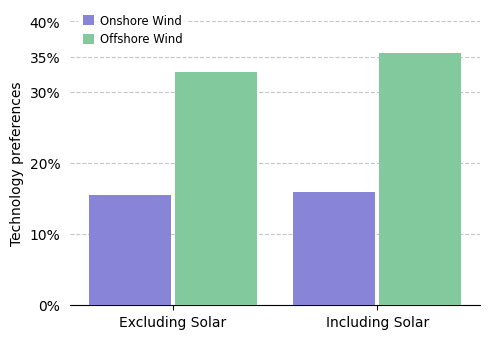

In [17]:
#Grouped bar chart of technology preference
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#onshore_wind = [24.5, 20]
#offshore_wind = [26.5, 29]

# Create the data
data = {
    'Scenario': ['Excluding Solar', 'Including Solar'],
    'Onshore Wind': [100*(69-35)/219,100*35/219], #0.315 
    'Offshore Wind': [100*(150-78)/219, 100*78/219] #0.685
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 3.5))

# Set the width of each bar and the positions of the bars
width = 0.4
x = np.arange(len(df['Scenario']))

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Create the bars with a small gap between groups
ax.bar(x - width/2 - 0.01, df['Onshore Wind'], width, label='Onshore Wind', color='#8884d8', zorder=3)
ax.bar(x + width/2 + 0.01, df['Offshore Wind'], width, label='Offshore Wind', color='#82ca9d', zorder=3)

# Customize the plot
ax.set_ylabel('Technology preferences')
#ax.set_title('Wind Capacity Installation')
ax.set_xticks(x)
ax.set_xticklabels(df['Scenario'])

custom_ticks = [0, 10, 20, 30, 35, 40]
ax.set_yticks(custom_ticks)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.0f}%"))
ax.set_ylim(0, 40)
#ax.yaxis.set_major_locator(plt.MultipleLocator())


# Adjust legend: remove border, make markers square and smaller, move to left
legend = ax.legend(loc='center left', fontsize='small', borderaxespad=0, 
                   bbox_to_anchor=(0.02, 0.97), 
                   handlelength=1, handleheight=1, handletextpad=0.5)
legend.get_frame().set_linewidth(0)  # Remove legend border
#for handle in legend.legendHandles:
#    handle.set_marker('s')  # Make markers square
#    handle.set_markersize(6)  # Adjust size of markers

# Add value labels on top of each bar
#for i, v in enumerate(df['Onshore Wind']):
#    ax.text(i - width/2 - 0.02, v, str(v), ha='center', va='bottom')
#for i, v in enumerate(df['Offshore Wind']):
#    ax.text(i + width/2 + 0.02, v, str(v), ha='center', va='bottom')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('technology_preferences.png', dpi=300, bbox_inches='tight')
plt.show()